### MNIST neural network - Hyperparameter Optimization using Keras

### Loading the dataset : Lets us load the training and the test data and check the size of the tensors. Lets us also display the first few images from the training set.

In [3]:
import keras
from keras.datasets import mnist
from keras.utils import np_utils


(train_features, train_targets), (test_features, test_targets) = mnist.load_data()

train_features = train_features.reshape(60000, 784)
print(train_features.shape)
test_features = test_features.reshape(10000, 784)
print(test_features.shape)


# # normalize inputs from 0-255 to 0-1
train_features = train_features / 255.0
test_features = test_features / 255.0

print train_targets.shape
print test_targets.shape

X_train = train_features
y_train = train_targets

X_val = test_features
y_val = test_targets

# convert class vectors to binary class matrices for keras
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


label for each of the below image: 5
label for each of the below image: 0
label for each of the below image: 4
label for each of the below image: 1
label for each of the below image: 9
label for each of the below image: 2
label for each of the below image: 1
label for each of the below image: 3
label for each of the below image: 1
label for each of the below image: 4


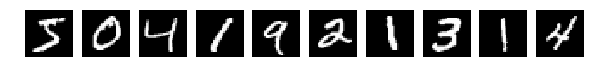

In [4]:
import numpy as np
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap="gray")
    plt.axis('off')
    print('label for each of the below image: %s' % (np.argmax(y_train[0:10][i])))
plt.show()


**Importing Necessary packages**

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from keras import optimizers

#### Model - Written in a function - to run it multiple times 

In [0]:
def train_and_test_loop(iterations, lr, Lambda, verb=True):
    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 256
    output_nodes = 10
        
    model = Sequential()
    model.add(Dense(hidden_nodes, input_shape=(784,), activation='relu'))
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_train, y_train, epochs=iterations, batch_size=1000, verbose= 1)

    


**Model 2**

Same Model as above - Instead of accuracy at each epoch - Below code gives the consolidate accuracy (Notice: The model.evaluate line at the last is the only difference from previous code)

In [0]:
def train_and_test_loop1(iterations, lr, Lambda, verb=True):
    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 256
    output_nodes = 10

    model = Sequential()
    model.add(Dense(hidden_nodes, input_shape=(784,), activation='relu'))
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_train, y_train, epochs=iterations, batch_size=1000, verbose= 1)
    score = model.evaluate(X_train, y_train, verbose=0)
    return score

### Double Check that the loss is reasonable : Disable the regularization (Lambda = 0)

In [24]:
lr = 0.00001
Lambda = 0
train_and_test_loop(1, lr, Lambda)

Epoch 1/1
60000/60000 [==============================] - 1s 13us/step - loss: 2.3017 - acc: 0.1069


Is the loss range correct?? What about accuracy, does it make sense for an untrained network?

Absolutely!!! There are 10 output classes. And the model is predicting correctly predicting 1 up on 10 times (1/10 = 0.1% approx)as it is untrained!

### Now, lets crank up the Lambda(Regularization)and check what it does to our loss function.

In [25]:
lr = 0.00001
Lambda = 1e3
train_and_test_loop(1, lr, Lambda)

Epoch 1/1
60000/60000 [==============================] - 1s 15us/step - loss: 2301.0750 - acc: 0.0864


loss went up. Good! (Another sanity check)

### Now, lets overfit to a small subset of our dataset, in this case 20 images, to ensure our model architecture is good

In [0]:
X_train_subset = X_train[0:20]

In [0]:
y_train_subset = y_train[0:20]

In [0]:
X_train = X_train_subset
y_train = y_train_subset

In [37]:
X_train.shape

(20, 784)

In [38]:
y_train.shape

(20, 10)

### Tip: Make sure that you can overfit very small portion of the training data
So, set a small learning rate and turn regularization off

In the code below:
- Take the first 20 examples from MNIST
- turn off regularization(reg=0.0)
- use simple vanilla 'sgd'

Lets try and run for 500 iterations as the data set is very small

In [45]:
lr = 0.0001
Lambda = 0
train_and_test_loop(500, lr, Lambda)

Epoch 1/500
20/20 [==============================] - 1s 40ms/step - loss: 2.2960 - acc: 0.1000
Epoch 2/500
20/20 [==============================] - 0s 325us/step - loss: 2.2957 - acc: 0.1000
Epoch 3/500
20/20 [==============================] - 0s 240us/step - loss: 2.2952 - acc: 0.1000
Epoch 4/500
20/20 [==============================] - 0s 252us/step - loss: 2.2945 - acc: 0.1000
Epoch 5/500
20/20 [==============================] - 0s 287us/step - loss: 2.2936 - acc: 0.1000
Epoch 6/500
20/20 [==============================] - 0s 310us/step - loss: 2.2925 - acc: 0.1000
Epoch 7/500
20/20 [==============================] - 0s 310us/step - loss: 2.2913 - acc: 0.1000
Epoch 8/500
20/20 [==============================] - 0s 329us/step - loss: 2.2899 - acc: 0.1000
Epoch 9/500
20/20 [==============================] - 0s 308us/step - loss: 2.2884 - acc: 0.1000
Epoch 10/500
20/20 [==============================] - 0s 322us/step - loss: 2.2868 - acc: 0.1000
Epoch 11/500
20/20 [====================

# Very small loss,  train accuracy going to 100, nice! We are successful in overfitting. The model architecture looks fine. Lets go for fine tuning it.

#### Loading the original dataset again

In [0]:
import keras
from keras.datasets import mnist
from keras.utils import np_utils


(train_features, train_targets), (test_features, test_targets) = mnist.load_data()

train_features = train_features.reshape(60000, 784)
print train_features.shape
test_features = test_features.reshape(10000, 784)
print test_features.shape


# # normalize inputs from 0-255 to 0-1
train_features = train_features / 255.0
test_features = test_features / 255.0

print train_targets.shape
print test_targets.shape

X_train = train_features
y_train = train_targets

X_val = test_features
y_val = test_targets

# convert class vectors to binary class matrices for keras
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


### Start with small regularization and find learning rate that makes the loss go down.

- we start with Lambda(small regularization) = 1e-7
- we start with a small learning rate = 1e-7

In [0]:
lr = 1e-7
Lambda = 1e-7
train_and_test_loop(20, lr, Lambda)

Epoch 1/20
60000/60000 [==============================] - 1s 13us/step - loss: 2.3237 - acc: 0.1151
Epoch 2/20
60000/60000 [==============================] - 1s 9us/step - loss: 2.3236 - acc: 0.1151
Epoch 3/20
60000/60000 [==============================] - 1s 8us/step - loss: 2.3236 - acc: 0.1151
Epoch 4/20
60000/60000 [==============================] - 1s 9us/step - loss: 2.3236 - acc: 0.1151
Epoch 5/20
60000/60000 [==============================] - 1s 9us/step - loss: 2.3235 - acc: 0.1151
Epoch 6/20
60000/60000 [==============================] - 1s 9us/step - loss: 2.3235 - acc: 0.1151
Epoch 7/20
60000/60000 [==============================] - 1s 9us/step - loss: 2.3235 - acc: 0.1151
Epoch 8/20
60000/60000 [==============================] - 1s 9us/step - loss: 2.3234 - acc: 0.1151
Epoch 9/20
60000/60000 [==============================] - 1s 9us/step - loss: 2.3234 - acc: 0.1152
Epoch 10/20
60000/60000 [==============================] - 1s 9us/step - loss: 2.3234 - acc: 0.1152
Epoch 11

# **Loss barely changing. Learning rate is probably too low.**

### Okay now lets try a (larger) learning rate 1e6. What could possibly go wrong?

- Learning rate lr = 1e8
- Regularization lambda = 1e-7


In [0]:
lr = 1e8
Lambda = 1e-7
train_and_test_loop(20, lr, Lambda)

Epoch 1/20
60000/60000 [==============================] - 1s 14us/step - loss: nan - acc: 0.0998
Epoch 2/20
60000/60000 [==============================] - 1s 9us/step - loss: nan - acc: 0.0987
Epoch 3/20
60000/60000 [==============================] - 1s 9us/step - loss: nan - acc: 0.0987
Epoch 4/20
60000/60000 [==============================] - 1s 9us/step - loss: nan - acc: 0.0987
Epoch 5/20
60000/60000 [==============================] - 1s 9us/step - loss: nan - acc: 0.0987
Epoch 6/20
60000/60000 [==============================] - 1s 9us/step - loss: nan - acc: 0.0987
Epoch 7/20
60000/60000 [==============================] - 1s 9us/step - loss: nan - acc: 0.0987
Epoch 8/20
60000/60000 [==============================] - 1s 9us/step - loss: nan - acc: 0.0987
Epoch 9/20
60000/60000 [==============================] - 1s 9us/step - loss: nan - acc: 0.0987
Epoch 10/20
60000/60000 [==============================] - 1s 9us/step - loss: nan - acc: 0.0987
Epoch 11/20
60000/60000 [=============

# Loss exploding. Learning rate is too high. 
# Cost is very high. Always means high learning rate

### Lets try to train now with a value of learning rate between 1e-7 and 1e8

- learning rate = 1e4
- regularization remains the small, lambda = 1e-7

In [0]:
lr = 1e4
Lambda = 1e-7
train_and_test_loop(20, lr, Lambda)

Epoch 1/20
60000/60000 [==============================] - 1s 15us/step - loss: 58.5402 - acc: 0.1018
Epoch 2/20
60000/60000 [==============================] - 1s 9us/step - loss: 20.3174 - acc: 0.1022
Epoch 3/20
60000/60000 [==============================] - 1s 9us/step - loss: 14.7158 - acc: 0.1022
Epoch 4/20
60000/60000 [==============================] - 1s 9us/step - loss: 14.4809 - acc: 0.1022
Epoch 5/20
60000/60000 [==============================] - 1s 9us/step - loss: 14.4715 - acc: 0.1022
Epoch 6/20
60000/60000 [==============================] - 1s 9us/step - loss: 14.4711 - acc: 0.1022
Epoch 7/20
60000/60000 [==============================] - 1s 9us/step - loss: 14.4711 - acc: 0.1022
Epoch 8/20
60000/60000 [==============================] - 1s 9us/step - loss: 14.4711 - acc: 0.1022
Epoch 9/20
60000/60000 [==============================] - 1s 9us/step - loss: 14.4711 - acc: 0.1022
Epoch 10/20
60000/60000 [==============================] - 1s 9us/step - loss: 14.4711 - acc: 0.102

# Still too high learning rate. Loss is not decreasing. The rough range of learning rate we should be cross validating is somewhere between [1e3 to 1e-7]

### Hyperparameter Optimization

### Cross validation Strategy


- Do coarse -> fine cross-validation in stages

- First stage: only a few epochs to get rough idea of what params work
- Second stage: longer running time, finer search
- … (repeat as necessary)

### Tip for detecting explosions in the solver: 
- If the cost is ever > 3 * original cost, break out early




### For example: Run coarse search for 10 times with different lr and Lambda values each with 100 epochs.


In [0]:
import math
for k in range(1,10):
    lr = math.pow(10, np.random.uniform(-7.0, 3.0))
    Lambda = math.pow(10, np.random.uniform(-7,-2))
    best_acc = train_and_test_loop1(100, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 100, best_acc, lr, Lambda))

Try 1/100: Best_val_acc: [2.365488526026408, 0.12695], lr: 1.11809856915e-07, Lambda: 0.000946165103441

Try 2/100: Best_val_acc: [0.21382962665160496, 0.95515], lr: 0.00288052530536, Lambda: 0.00707906856013

Try 3/100: Best_val_acc: [1.4440274930318198, 0.72805], lr: 2.49621005573e-05, Lambda: 6.4284973297e-05

Try 4/100: Best_val_acc: [14.477966685485839, 0.10218333333333333], lr: 1.56800041108, Lambda: 3.6524699656e-07

Try 5/100: Best_val_acc: [1.9876144175211587, 0.5349], lr: 1.04728723451e-05, Lambda: 3.8977609595e-06

Try 6/100: Best_val_acc: [14.30695860748291, 0.11236666666666667], lr: 29.2962424609, Lambda: 3.51827948084e-05

Try 7/100: Best_val_acc: [0.003095428049067656, 0.9999833333333333], lr: 0.133901763307, Lambda: 2.82775881833e-05

Try 8/100: Best_val_acc: [2.3921175683339437, 0.08501666666666667], lr: 7.47336000333e-07, Lambda: 0.00197040022574

Try 9/100: Best_val_acc: [14.435097432454427, 0.10441666666666667], lr: 55.9789702653, Lambda: 9.7262362823e-06



# As you can see from above, Case 2, 3 and 7 yields good accuracy. It is better to focus on those values for learning rate and Lambda

### Now run finer search

In [0]:
import math
for k in range(1,5):
    lr = math.pow(10, np.random.uniform(-4.0, -1.0))
    Lambda = math.pow(10, np.random.uniform(-4,-2))
    best_acc = train_and_test_loop1(100, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 100, best_acc, lr, Lambda))

Try 1/100: Best_val_acc: [0.008815488726149004, 1.0], lr: 0.0815353999079, Lambda: 0.00027167302341

Try 2/100: Best_val_acc: [0.10436611174941063, 0.98165], lr: 0.0065976982651, Lambda: 0.00178363314204

Try 3/100: Best_val_acc: [0.31089934004743897, 0.9146666666666666], lr: 0.000347642611382, Lambda: 0.000205676702154

Try 4/100: Best_val_acc: [0.5145512306849161, 0.8963666666666666], lr: 0.000191813129949, Lambda: 0.00597561369417



### Running deep with lr=0.01 and Lambda=1e-4

In [0]:
lr = 1e-2
Lambda = 1e-4
train_and_test_loop1(100, lr, Lambda)

Epoch 1/100
60000/60000 [==============================] - 1s 23us/step - loss: 1.4373 - acc: 0.6338
Epoch 2/100
60000/60000 [==============================] - 1s 9us/step - loss: 0.4606 - acc: 0.8728
Epoch 3/100
60000/60000 [==============================] - 1s 9us/step - loss: 0.3585 - acc: 0.8985
Epoch 4/100
60000/60000 [==============================] - 1s 9us/step - loss: 0.3173 - acc: 0.9096
Epoch 5/100
60000/60000 [==============================] - 1s 9us/step - loss: 0.2906 - acc: 0.9177
Epoch 6/100
60000/60000 [==============================] - 1s 9us/step - loss: 0.2705 - acc: 0.9229
Epoch 7/100
60000/60000 [==============================] - 1s 9us/step - loss: 0.2542 - acc: 0.9282
Epoch 8/100
60000/60000 [==============================] - 1s 9us/step - loss: 0.2395 - acc: 0.9330
Epoch 9/100
60000/60000 [==============================] - 1s 9us/step - loss: 0.2278 - acc: 0.9363
Epoch 10/100
60000/60000 [==============================] - 1s 9us/step - loss: 0.2163 - acc: 0.940

[0.031227748871594668, 0.9950666666666667]